In [ ]:
import statsmodels.formula.api as smf
import pandas as pd 

import os
# change working directory
os.chdir('/Users/gerardogutierrez/Desktop/Academics/Spring_2026/plant-health-status/Notebooks')

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame display

In [8]:


# drop non-predictors
model_df = pd.read_csv('../Data/regression_data.csv')

model_1 = smf.ols(
    formula="""
        total_fresh_weight_g
        ~ carbon_dioxide
        + temp_env
        + humidity
        + pressure
        + electrical_conductivity
        + volume
        + temp_nutr
        + volume_flow_rate
        + weight_lag_1
        + weight_lag_2
    """,
    data=model_df
).fit()

print(model_1.summary())

                             OLS Regression Results                             
Dep. Variable:     total_fresh_weight_g   R-squared:                       0.996
Model:                              OLS   Adj. R-squared:                  0.996
Method:                   Least Squares   F-statistic:                     2058.
Date:                  Fri, 13 Feb 2026   Prob (F-statistic):           3.45e-61
Time:                          14:41:18   Log-Likelihood:                -171.34
No. Observations:                    60   AIC:                             358.7
Df Residuals:                        52   BIC:                             375.4
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

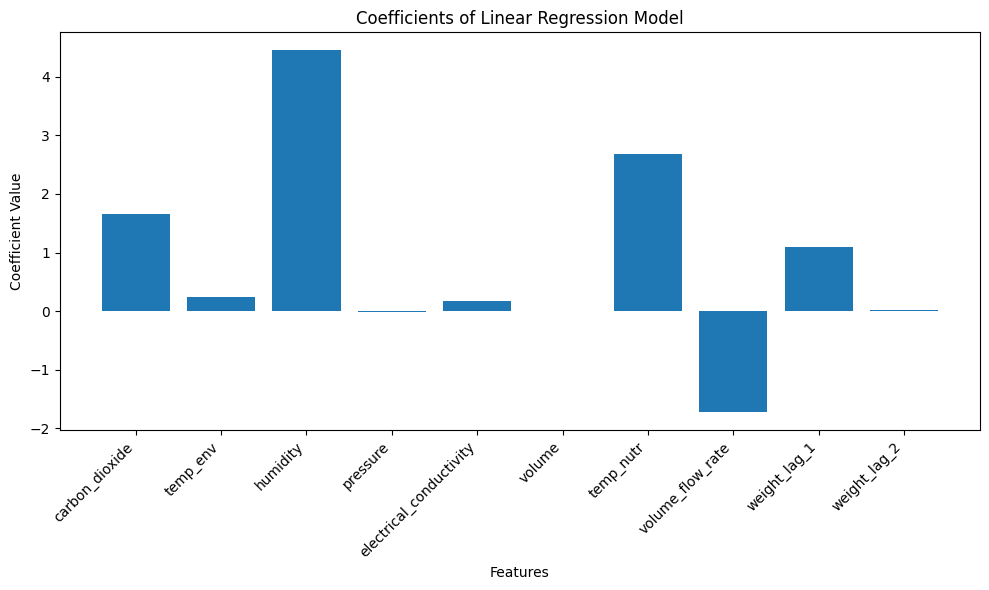

In [11]:
# bargraph of coefficients
import matplotlib.pyplot as plt
coefficients = model_1.params[1:]  # Exclude the intercept
features = coefficients.index
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Linear Regression Model')
plt.tight_layout()
plt.show()

* Humidity and water temperature have strongest positively associated features with lettuce weight. 
* However, examining the confidence interval tells us that the coefficient of water temperature could be zero. We are 95% confident that humidity is a positive predictor of lettuce weight. 
* Adiditonally there is strong multicollinearity
* r sqaured and rmse is good 
* remove insignificant p values from report 
* add time series neural network model and compare results to OLS

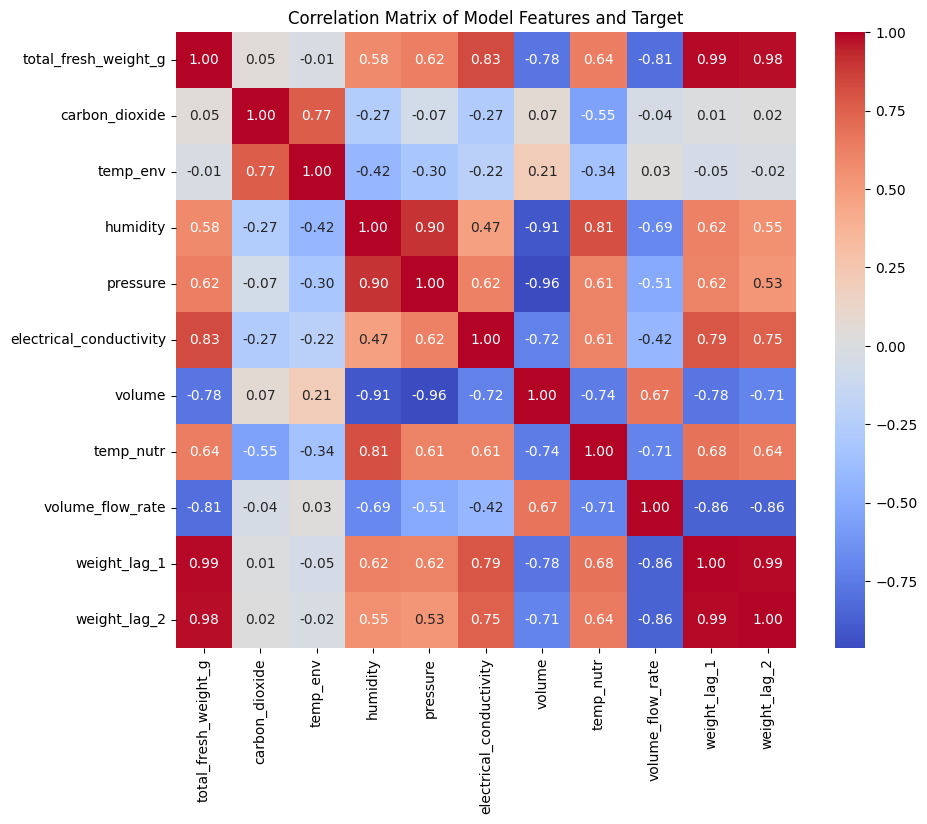

In [10]:
# correlation matrix of model_df
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(model_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Model Features and Target")
plt.show()